In [16]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [87]:
data = pd.read_csv('P:/python/delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [15]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [88]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [57]:
data[data.duplicated()]

,Delivery Time,Sorting Time


In [89]:
data1 = data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [90]:
data1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

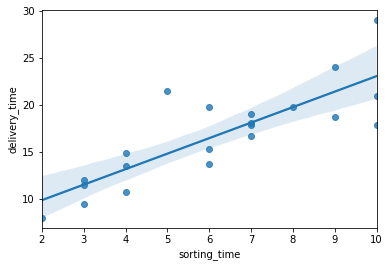

In [10]:
sns.regplot(x='sorting_time',y='delivery_time',data=data1)

Here the data follows stright line so it is linear. And the directions +ve. And the strength is stronger. 

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'delivery time')

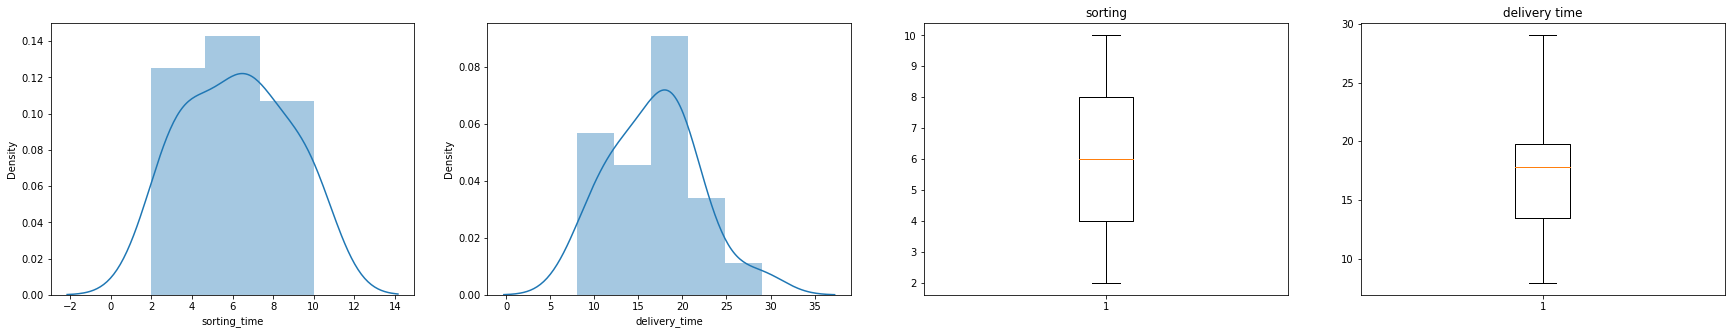

In [113]:
plt.subplots(figsize=(30,5))
plt.subplot(1,4,1)
sns.distplot(data1.sorting_time)
plt.subplot(1,4,2)
sns.distplot(data1.delivery_time)
plt.subplot(1,4,3)
plt.boxplot(data1.sorting_time)
plt.title('sorting')
plt.subplot(1,4,4)
plt.boxplot(data1.delivery_time)
plt.title('delivery time')

In this data there is no outliers. And sorting time following normal distribution. Delivery time is not following normal distribution.

## Transformations

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

Text(0.5, 1.0, 'poly')

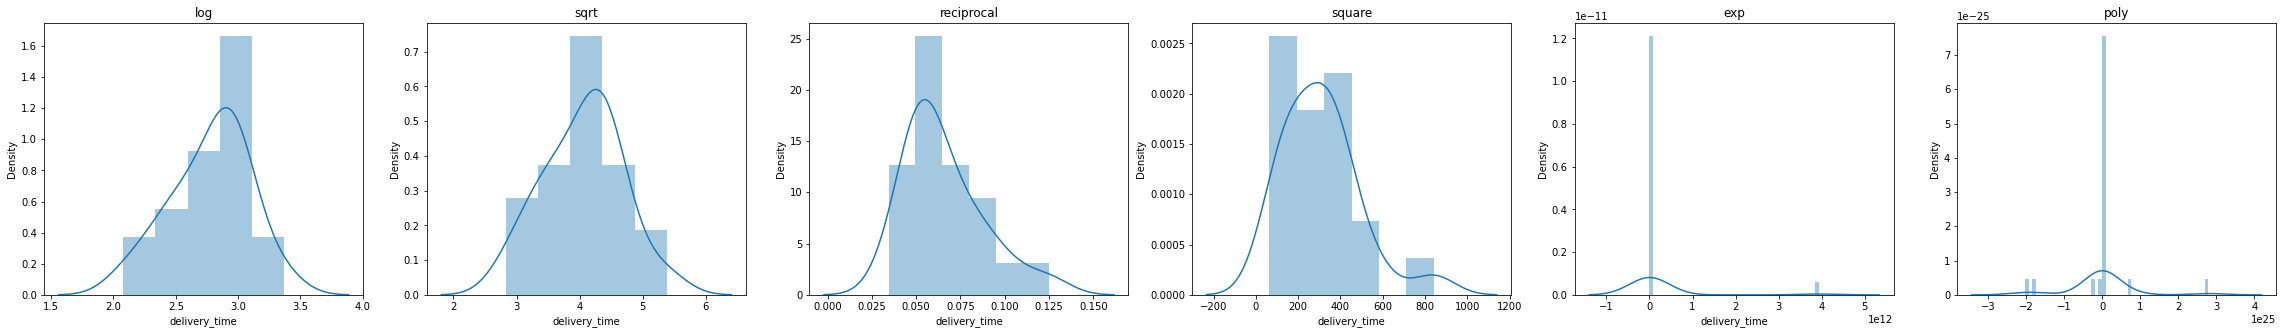

In [110]:
l = np.log(data1.delivery_time)
s = np.sqrt(data1.delivery_time)
r = np.reciprocal(data1.delivery_time)
sq = np.square(data1.delivery_time)
e = np.exp(data1.delivery_time)
p = np.poly(data1.delivery_time)
plt.subplots(figsize=(40,5))
plt.subplot(1,6,1)
sns.distplot(l)
plt.title('log')
plt.subplot(1,6,2)
sns.distplot(s)
plt.title('sqrt')
plt.subplot(1,6,3)
sns.distplot(r)
plt.title('reciprocal')
plt.subplot(1,6,4)
sns.distplot(sq)
plt.title('square')
plt.subplot(1,6,5)
sns.distplot(e)
plt.title('exp')
plt.subplot(1,6,6)
sns.distplot(p)
plt.title('poly')

After doing transformations also no data is following normal distribution.

In [92]:
model = smf.ols("delivery_time ~ sorting_time",data = data1).fit()

In [93]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [94]:
model.tvalues, model.pvalues   

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        19:21:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

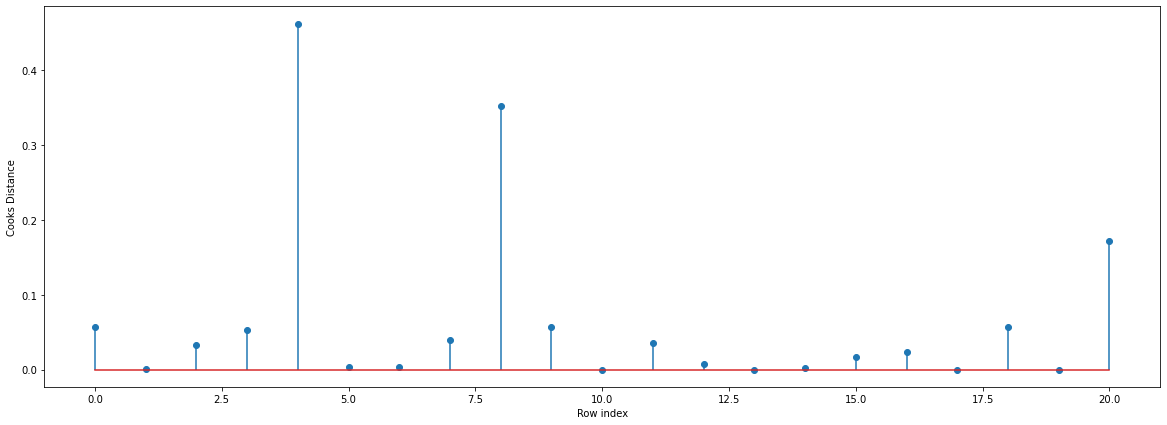

In [97]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [98]:
(np.argmax(c),np.max(c))

(4, 0.4620530412650319)

In [100]:
data1[data1.index.isin([4])]

,delivery_time,sorting_time
4,29.0,10


In [101]:
data_new = data1

In [102]:
data2=data_new.drop(data_new.index[[4]],axis=0).reset_index()

In [103]:
model1 = smf.ols('delivery_time ~ sorting_time',data=data2).fit()

In [104]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     34.97
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.35e-05
Time:                        19:22:57   Log-Likelihood:                -46.449
No. Observations:                  20   AIC:                             96.90
Df Residuals:                      18   BIC:                             98.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.5342      1.574      4.788      0.000       4.228      10.840
sorting_time     1.4411      0.244      5.914      0.000       0.929       1.953
==============================================================================
Omnibus:                        5.574   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.289
Skew:                           0.906   Prob(JB):                        0.193
Kurtosis:                       3.816   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
newdata=pd.Series([2,4])
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
model.predict(data_pred)

0     9.880774
1    13.178814
dtype: float64

In [106]:
6.582734+1.649020*2

9.880774

In [107]:
preds = model.predict(data2.sorting_time)
preds

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     16.476853
5     18.125873
6     11.529794
7     23.072933
8     21.423913
9     19.774893
10    13.178814
11    18.125873
12    11.529794
13    11.529794
14    13.178814
15    16.476853
16    18.125873
17     9.880774
18    18.125873
19    14.827833
dtype: float64

Here Predicted delivery time using sorting time with first model. Because the R^2 value of First model is high when compare to second model. 

In [109]:
#RMSE
import numpy as np
np.sqrt(np.mean((data2.delivery_time - preds)**2))

2.5350485063426027